In [2]:
import sys
from pyprojroot import here
sys.path.insert(0, str(here()))

here we expect a identity result, using CNOT and IX as var_gates

1. would they lead the same result as the identity gate when using SWAP ob?

=> No, after testing we could find the output would be 1/2, which is independent of t. same with simply using CNOT

? though this seems a little weird?

# Gate eigen-decoposition

In [6]:
%matplotlib inline
import numpy as np
import sympy as sp
from sympy import sqrt, symbols, pi, cos, Matrix, latex, trace
from IPython.display import display, Math
from Utils import CNOT, CNOT2, Id, X

eigenvalues, eigenvectors = np.linalg.eig(CNOT)

P = eigenvectors
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)

P = Matrix(P)
P = sp.nsimplify(P)
P_inv = Matrix(P_inv)
P_inv = sp.nsimplify(P_inv)
print("P matrix:")
display(Math(latex(P)))
print("D matrix:\n", D)
print("P_inv matrix:")
display(Math(latex(P_inv)))


IX = np.kron(Id, X)
# 计算CNOT门的本征值和本征向量
eigenvalues2, eigenvectors2 = np.linalg.eig(IX)

# 计算P和D矩阵
P2 = eigenvectors2
D2 = np.diag(eigenvalues2)
P2_inv = np.linalg.inv(P2)

P2 = Matrix(P2)
P2 = sp.nsimplify(P2)
P2_inv = Matrix(P2_inv)
P2_inv = sp.nsimplify(P2_inv)
# 输出P和D矩阵
print("P2 matrix:")
display(Math(latex(P2)))
print("D2 matrix:\n", D2)
print("P2_inv matrix:")
display(Math(latex(P2_inv)))

P matrix:


<IPython.core.display.Math object>

D matrix:
 [[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
P_inv matrix:


<IPython.core.display.Math object>

P2 matrix:


<IPython.core.display.Math object>

D2 matrix:
 [[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]
P2_inv matrix:


<IPython.core.display.Math object>

# Circuit Form U(θ)

In [7]:
# 定义符号变量
theta = sp.Symbol('theta', real=True)
phi = sp.Symbol('phi', real=True)

# 定义矩阵D
D = sp.diag(1, sp.exp(sp.I*sp.pi*sp.cos(theta)**2), 1, 1)
D2 = sp.diag(1, sp.exp(sp.I*sp.pi*sp.cos(phi)**2), 1, sp.exp(sp.I*sp.pi*sp.cos(phi)**2))

print("D(θ):")
display(Math(latex(D)))
print("D2(φ):")
display(Math(latex(D2)))

U = (P2 @ D2 @ P2_inv) @ (P @ D @ P_inv)
U.simplify()

print("U(θ):")
display(Math(latex(U)))

D(θ):


<IPython.core.display.Math object>

D2(φ):


<IPython.core.display.Math object>

U(θ):


<IPython.core.display.Math object>

As the Z msmt result of input 00 and 11 are related to the front two columns of the matrix, we could easily found outputs of them are 1 and -1, respectively. Both of them are independent of θ.

# O_tilde

In [8]:
from Utils import SWAP

Ob = Matrix(SWAP)

print("Observable matrix:")
display(Ob)

# 计算U(a)^\dagger O U(a)
U_dagger = U.H
O_tilde = U_dagger @ Ob @ U
O_tilde.simplify()

print("U:")
display(Math(latex(U)))
print("U(a)^\dagger:")
display(Math(latex(U_dagger)))
# print("U(a)^\dagger @ Ob:")
# display(Math(latex(U_dagger@Ob)))
print("O_tilde:")
display(Math(latex(O_tilde)))

Observable matrix:


Matrix([
[1, 0, 0, 0],
[0, 0, 1, 0],
[0, 1, 0, 0],
[0, 0, 0, 1]])

U:


<IPython.core.display.Math object>

U(a)^\dagger:


<IPython.core.display.Math object>

O_tilde:


<IPython.core.display.Math object>

# PO and SG

In [9]:
from Symmetries.WernerSysSwapSymmetry import WernerSysSwapSymmetry
symmetry = WernerSysSwapSymmetry(1)

#TODO: yes, could add a custom symmetry here

PO = symmetry._twirling(np.array(O_tilde))
PO = Matrix(np.array(PO))
PO.simplify()
display(Math(latex(PO)))

<IPython.core.display.Math object>

In [10]:
# 计算 PO 和 O_tilde 之间的差
diff_matrix = PO - O_tilde

# 计算 H-S norm
# HS_norm = sqrt(sum([abs(elem)**2 for elem in diff_matrix]))
# HS_norm = sqrt(trace(diff_matrix.H * diff_matrix))
HS_norm = trace(diff_matrix.H * diff_matrix)

# 简化表达式
HS_norm = HS_norm.simplify()

print("HS_norm:")
display(Math(latex(HS_norm)))

HS_norm:


<IPython.core.display.Math object>

we could see that, for all kinds of possible circuit parameter settings, twirling operation would make the prediction better or worse or keeps.

Then its hard to tell what would twirling do to the circuit.

# SG Plot

output on 00 and 11 would always be constant values as stated below, here we plot the SG relative to $\theta$

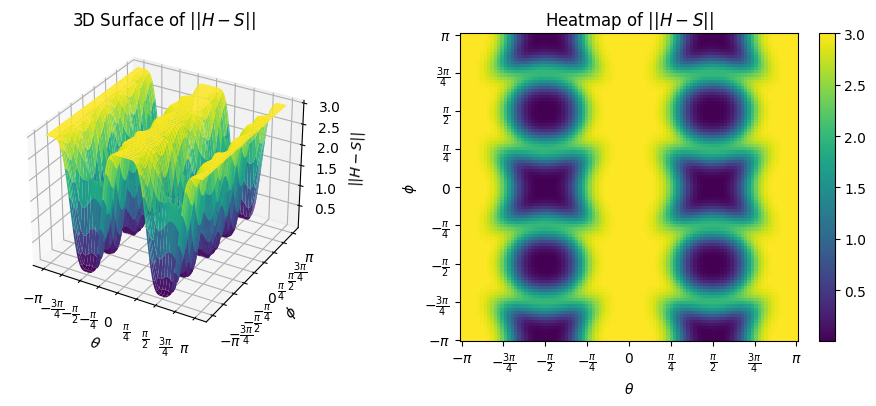

In [11]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

ticks = np.linspace(-np.pi, np.pi, 9)
tick_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', 0, r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']

theta_samples = np.linspace(-np.pi, np.pi, 100)
phi_samples = np.linspace(-np.pi, np.pi, 100)
theta_samples, phi_samples = np.meshgrid(theta_samples, phi_samples)

y_sg_func = sp.lambdify([theta, phi], HS_norm, 'numpy')
y_sg_values = np.abs(y_sg_func(theta_samples,phi_samples))

fig = plt.figure(figsize=(12, 4))

# 3D 曲面子图
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(theta_samples, phi_samples, y_sg_values, cmap='viridis')
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\phi$')
ax1.set_xticks(ticks)
ax1.set_xticklabels(tick_labels)
ax1.set_yticks(ticks)
ax1.set_yticklabels(tick_labels)
ax1.set_zlabel(r'$\|\|H-S\|\|$')
ax1.set_title(r'3D Surface of $\|\|H-S\|\|$')

# Heatmap 子图
ax2 = fig.add_subplot(122)
c = ax2.pcolormesh(theta_samples, phi_samples, y_sg_values, cmap='viridis', shading='auto')
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\phi$')
ax2.set_xticks(ticks)
ax2.set_xticklabels(tick_labels)
ax2.set_yticks(ticks)
ax2.set_yticklabels(tick_labels)
ax2.set_title(r'Heatmap of $\|\|H-S\|\|$')

# 添加 colorbar
fig.colorbar(c, ax=ax2)

plt.show()

so here means both I and IX would lead to sym-preserved result, I is apparent, IX..?

at least in this case, not two SG local minima correspond to two label strategies

   1. IX lead to trace result to be 1-0.5t, all t<= 2, then all samples would output ew > 0
   2. I lead to trace result to be 1.5t-1, t>=2/3 => ew>0, t<2/3 => ew<0, or say e_samples=> ew<0, s_samples=> ew>=0
   3. t<3/2 samples are e_states, t>=3/2 samples are s_states
      1. when labeling  1 ew > 0 as e_states, e_samples would like ew > 0, s_samples would like ew <= 0
      2. when labeling -1 ew < 0 as e_states, e_samples would like ew < 0, s_samples would like ew >= 0
   
   4. when labeling  1 ew > 0 as e_states, e_samples like IX, s_samples don't like either => means this strategy don't have a optimal result
   5. when labeling -1 ew < 0 as e_states, e_samples like I and hate IX, but s_samples like both
    
    split point is still 1 here comes from that when t=1, 1-0.5t=1.5t-1=0.5, when t smaller, 1-0.5t is more close to 1, and inverse when t larger

    which means that simply because this circuit is not powerful enough?

In [20]:
symmetry.group

[tensor([[1, 0, 0, 0],
         [0, 1, 0, 0],
         [0, 0, 1, 0],
         [0, 0, 0, 1]], requires_grad=True),
 tensor([[0, 0, 0, 1],
         [0, 0, 1, 0],
         [0, 1, 0, 0],
         [1, 0, 0, 0]], requires_grad=True),
 tensor([[ 0.+0.j,  0.+0.j,  0.+0.j, -1.-0.j],
         [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
         [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
         [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]], requires_grad=True),
 tensor([[ 1,  0,  0,  0],
         [ 0, -1,  0,  0],
         [ 0,  0, -1,  0],
         [ 0,  0,  0,  1]], requires_grad=True),
 tensor([[1, 0, 0, 0],
         [0, 1, 0, 0],
         [0, 0, 1, 0],
         [0, 0, 0, 1]], requires_grad=True),
 tensor([[0, 0, 0, 1],
         [0, 0, 1, 0],
         [0, 1, 0, 0],
         [1, 0, 0, 0]], requires_grad=True),
 tensor([[-0.+0.j,  0.+0.j,  0.+0.j, -1.-0.j],
         [-0.+0.j, -0.+0.j,  1.+0.j,  0.+0.j],
         [-0.+0.j,  1.+0.j, -0.+0.j,  0.+0.j],
         [-1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j]], requires_grad=T

In [19]:
y_sg_func(np.pi/2, np.pi/2)

-6.162975822039155e-33j

# Output forms of selected samples

seems that: We already know that SG would lead to the optimal point, then if samples would change the training result, we would say SG has improvement.

But: #TODO: won't these be a little deliberate? would these gates be implemented by normal quantum operations?

In [40]:
from Utils import bellState

# samples (we know that t>=0 are valid states and t>=2/3 are separable states)
# t_samples = np.linspace(0, 4/3, 5)
t_samples = np.array([0, 1/3, 2/3, 3/4, 5/4])

t = symbols('t')

phi_minus = Matrix(bellState('phi_minus'))
dm_phiMinus = t/4 * sp.eye(4) + (1-t) * (phi_minus * phi_minus.H)
# dm_g = (2-t)/6 * sp.eye(4) + (2*t-1)/6 * Matrix(SWAP)

# for t in t_samples:
#     print("t = ", t)
#     dm_phiMinus_t = dm_phiMinus.subs('t', t)
#     ew = trace(dm_phiMinus_t @ O_tilde)
#     ew.simplify()
#     ew = sp.nsimplify(ew)
#     print("ew:")
#     display(Math(latex(ew)))
#     print("------------------------------------------------------")

# loss function and label strategy

1. cc loss for each input

## square loss

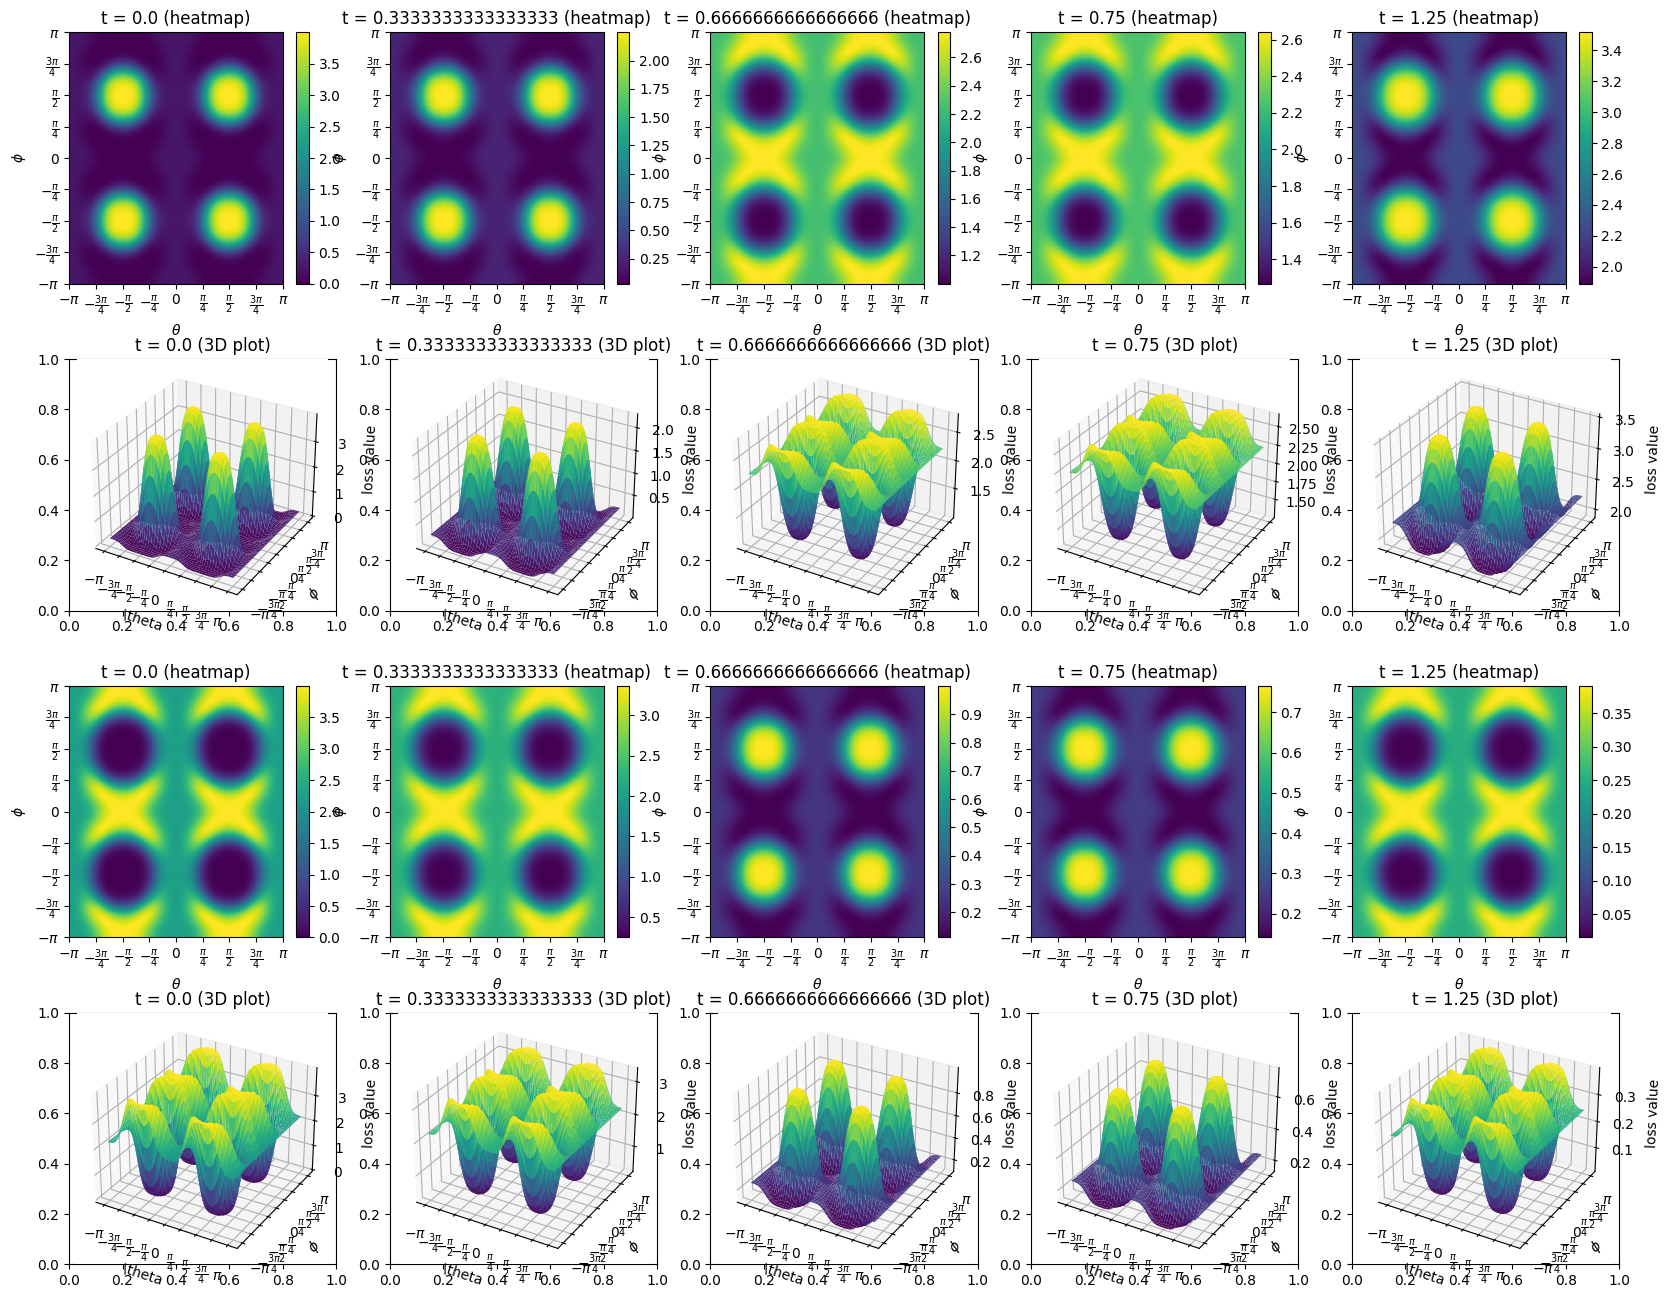

In [43]:
zLabels = [[1, 1, -1, -1, -1], [-1, -1, 1, 1, 1]] # entangled (f>=0) as 1 | entangled as -1

theta_samples = np.linspace(-np.pi, np.pi, 100)

fig, axs = plt.subplots(4, 5, figsize=(20, 16))

for zIdx, zLabel in enumerate(zLabels):
    for i in range(5):
        #* trace result
        dm_phiMinus_t = dm_phiMinus.subs('t', t_samples[i])
        ew_t = trace(dm_phiMinus_t @ O_tilde)

        #* loss form and samples
        y_square_loss = (ew_t - zLabel[i])**2
        y_square_loss_func = sp.lambdify([theta, phi], y_square_loss, 'numpy')
        y_square_loss_func_vectorized = np.vectorize(y_square_loss_func)
        y_square_loss_values = np.abs(y_square_loss_func_vectorized(theta_samples, phi_samples))

        axs[2*zIdx, i].set_title(f"t = {t_samples[i]} (heatmap)")
        heatmap = axs[2*zIdx, i].imshow(y_square_loss_values, cmap='viridis', origin='lower',
                                extent=[-np.pi, np.pi, -np.pi, np.pi], aspect='auto')
        axs[2*zIdx, i].set_xlabel(r'$\theta$')
        axs[2*zIdx, i].set_ylabel(r'$\phi$')
        axs[2*zIdx, i].set_xticks(ticks)
        axs[2*zIdx, i].set_xticklabels(tick_labels)
        axs[2*zIdx, i].set_yticks(ticks)
        axs[2*zIdx, i].set_yticklabels(tick_labels)
        fig.colorbar(heatmap, ax=axs[2*zIdx, i])

        axs[2*zIdx+1, i] = fig.add_subplot(4, 5, 10*zIdx+i+6, projection='3d')
        axs[2*zIdx+1, i].set_title(f"t = {t_samples[i]} (3D plot)")
        surf = axs[2*zIdx+1, i].plot_surface(theta_samples, phi_samples, y_square_loss_values, cmap='viridis', edgecolor='none')
        axs[2*zIdx+1, i].set_xlabel(r'\theta')
        axs[2*zIdx+1, i].set_ylabel(r'$\phi$')
        axs[2*zIdx+1, i].set_xticks(ticks)
        axs[2*zIdx+1, i].set_xticklabels(tick_labels)
        axs[2*zIdx+1, i].set_yticks(ticks)
        axs[2*zIdx+1, i].set_yticklabels(tick_labels)
        axs[2*zIdx+1, i].set_zlabel('loss value')
    
plt.subplots_adjust(hspace=0.3)
plt.show()

add SG

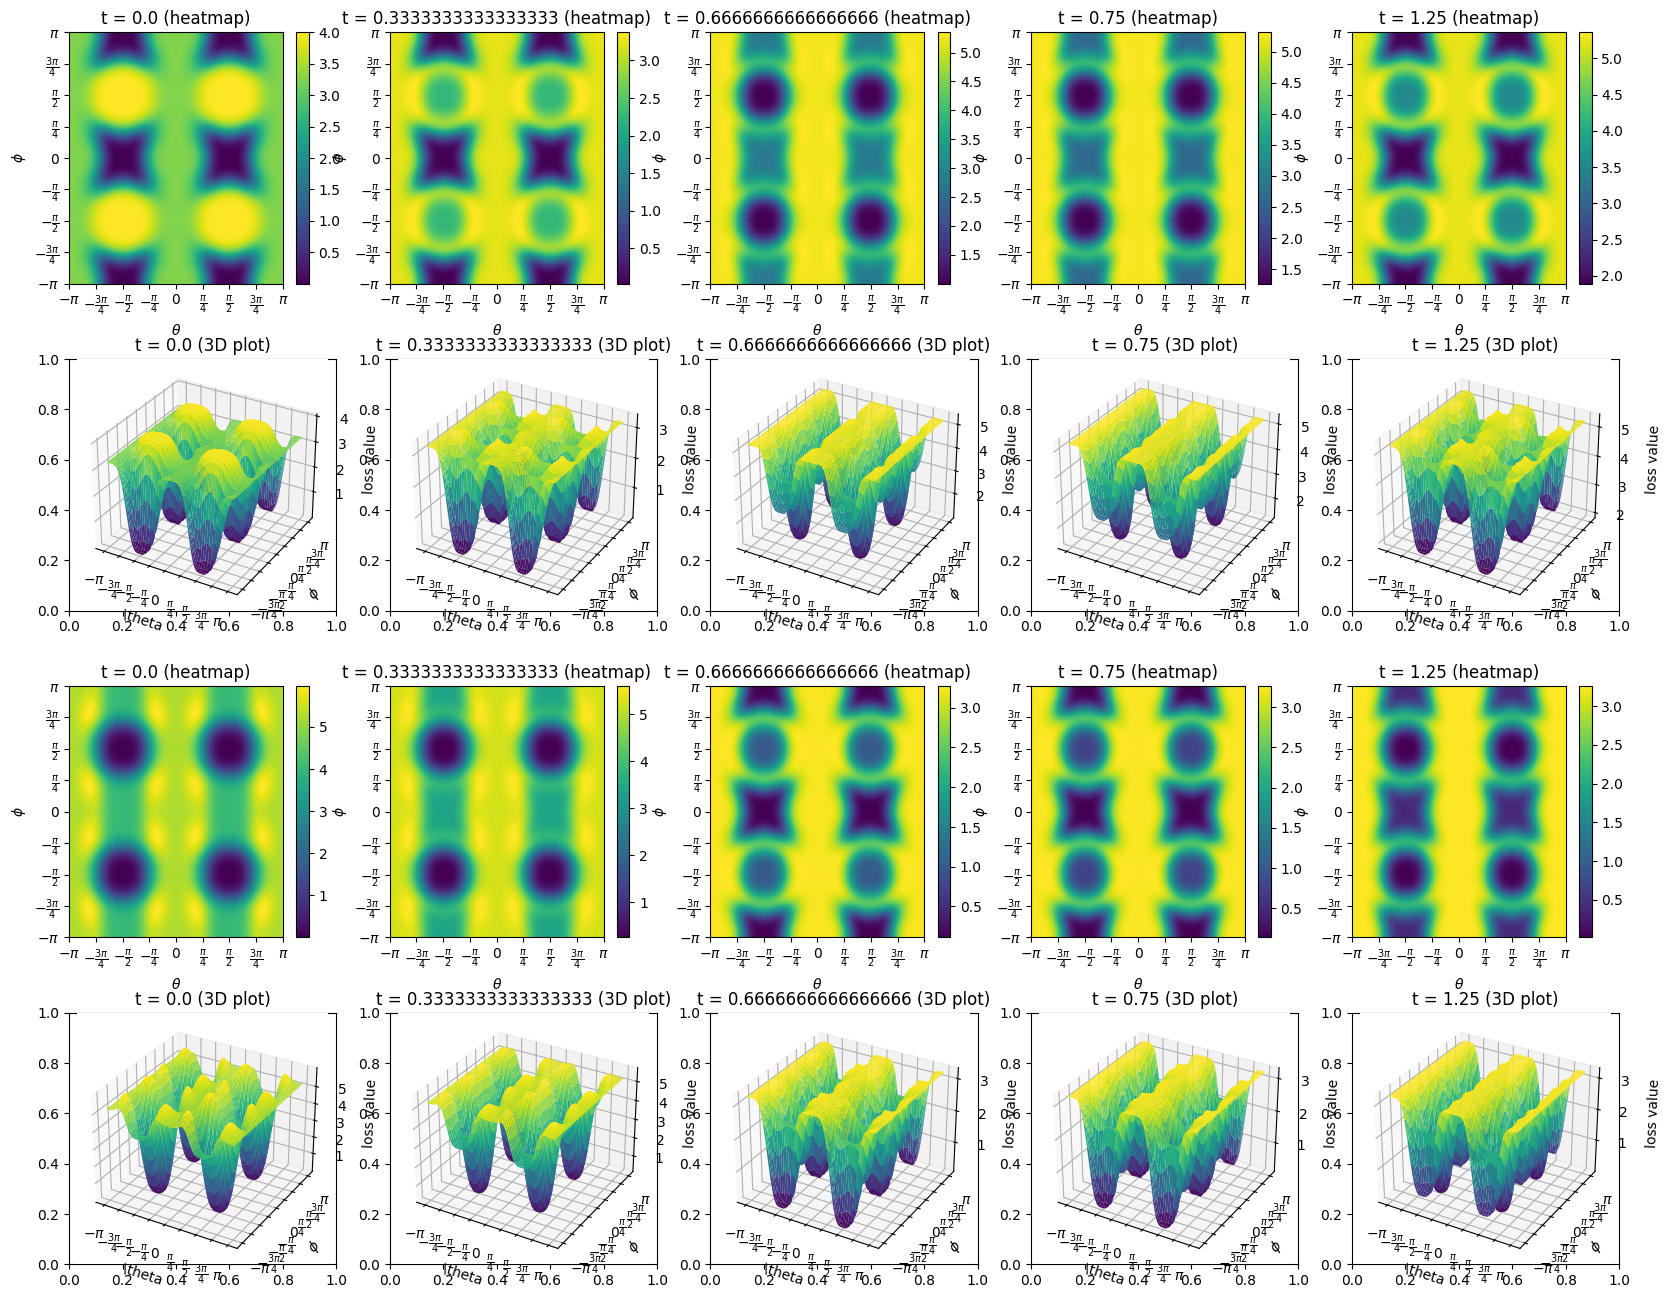

In [42]:
fig, axs = plt.subplots(4, 5, figsize=(20, 16))

for zIdx, zLabel in enumerate(zLabels):
    for i in range(5):
        #* trace result
        dm_phiMinus_t = dm_phiMinus.subs('t', t_samples[i])
        ew_t = trace(dm_phiMinus_t @ O_tilde)
        ew_t.simplify()
        ew_t = sp.nsimplify(ew_t)

        #* loss form and samples
        y_square_loss = (ew_t - zLabel[i])**2
        y_square_loss_func = sp.lambdify([theta, phi], y_square_loss, 'numpy')
        y_square_loss_func_vectorized = np.vectorize(y_square_loss_func)
        y_square_loss_values = y_square_loss_func_vectorized(theta_samples, phi_samples)
        sg_values = y_sg_func(theta_samples, phi_samples)
        y_square_loss_values_sg = np.abs(y_square_loss_values + sg_values) #TODO: why the sg value complex?

        axs[2*zIdx, i].set_title(f"t = {t_samples[i]} (heatmap)")
        heatmap = axs[2*zIdx, i].imshow(y_square_loss_values_sg, cmap='viridis', origin='lower',
                                extent=[-np.pi, np.pi, -np.pi, np.pi], aspect='auto')
        axs[2*zIdx, i].set_xlabel(r'$\theta$')
        axs[2*zIdx, i].set_ylabel(r'$\phi$')
        axs[2*zIdx, i].set_xticks(ticks)
        axs[2*zIdx, i].set_xticklabels(tick_labels)
        axs[2*zIdx, i].set_yticks(ticks)
        axs[2*zIdx, i].set_yticklabels(tick_labels)
        fig.colorbar(heatmap, ax=axs[2*zIdx, i])

        axs[2*zIdx+1, i] = fig.add_subplot(4, 5, 10*zIdx+i+6, projection='3d')
        axs[2*zIdx+1, i].set_title(f"t = {t_samples[i]} (3D plot)")
        surf = axs[2*zIdx+1, i].plot_surface(theta_samples, phi_samples, y_square_loss_values_sg, cmap='viridis', edgecolor='none')
        axs[2*zIdx+1, i].set_xlabel(r'\theta')
        axs[2*zIdx+1, i].set_ylabel(r'$\phi$')
        axs[2*zIdx+1, i].set_xticks(ticks)
        axs[2*zIdx+1, i].set_xticklabels(tick_labels)
        axs[2*zIdx+1, i].set_yticks(ticks)
        axs[2*zIdx+1, i].set_yticklabels(tick_labels)
        axs[2*zIdx+1, i].set_zlabel('loss value')
    
plt.subplots_adjust(hspace=0.3)
plt.show()

but.. seems no apparent differences

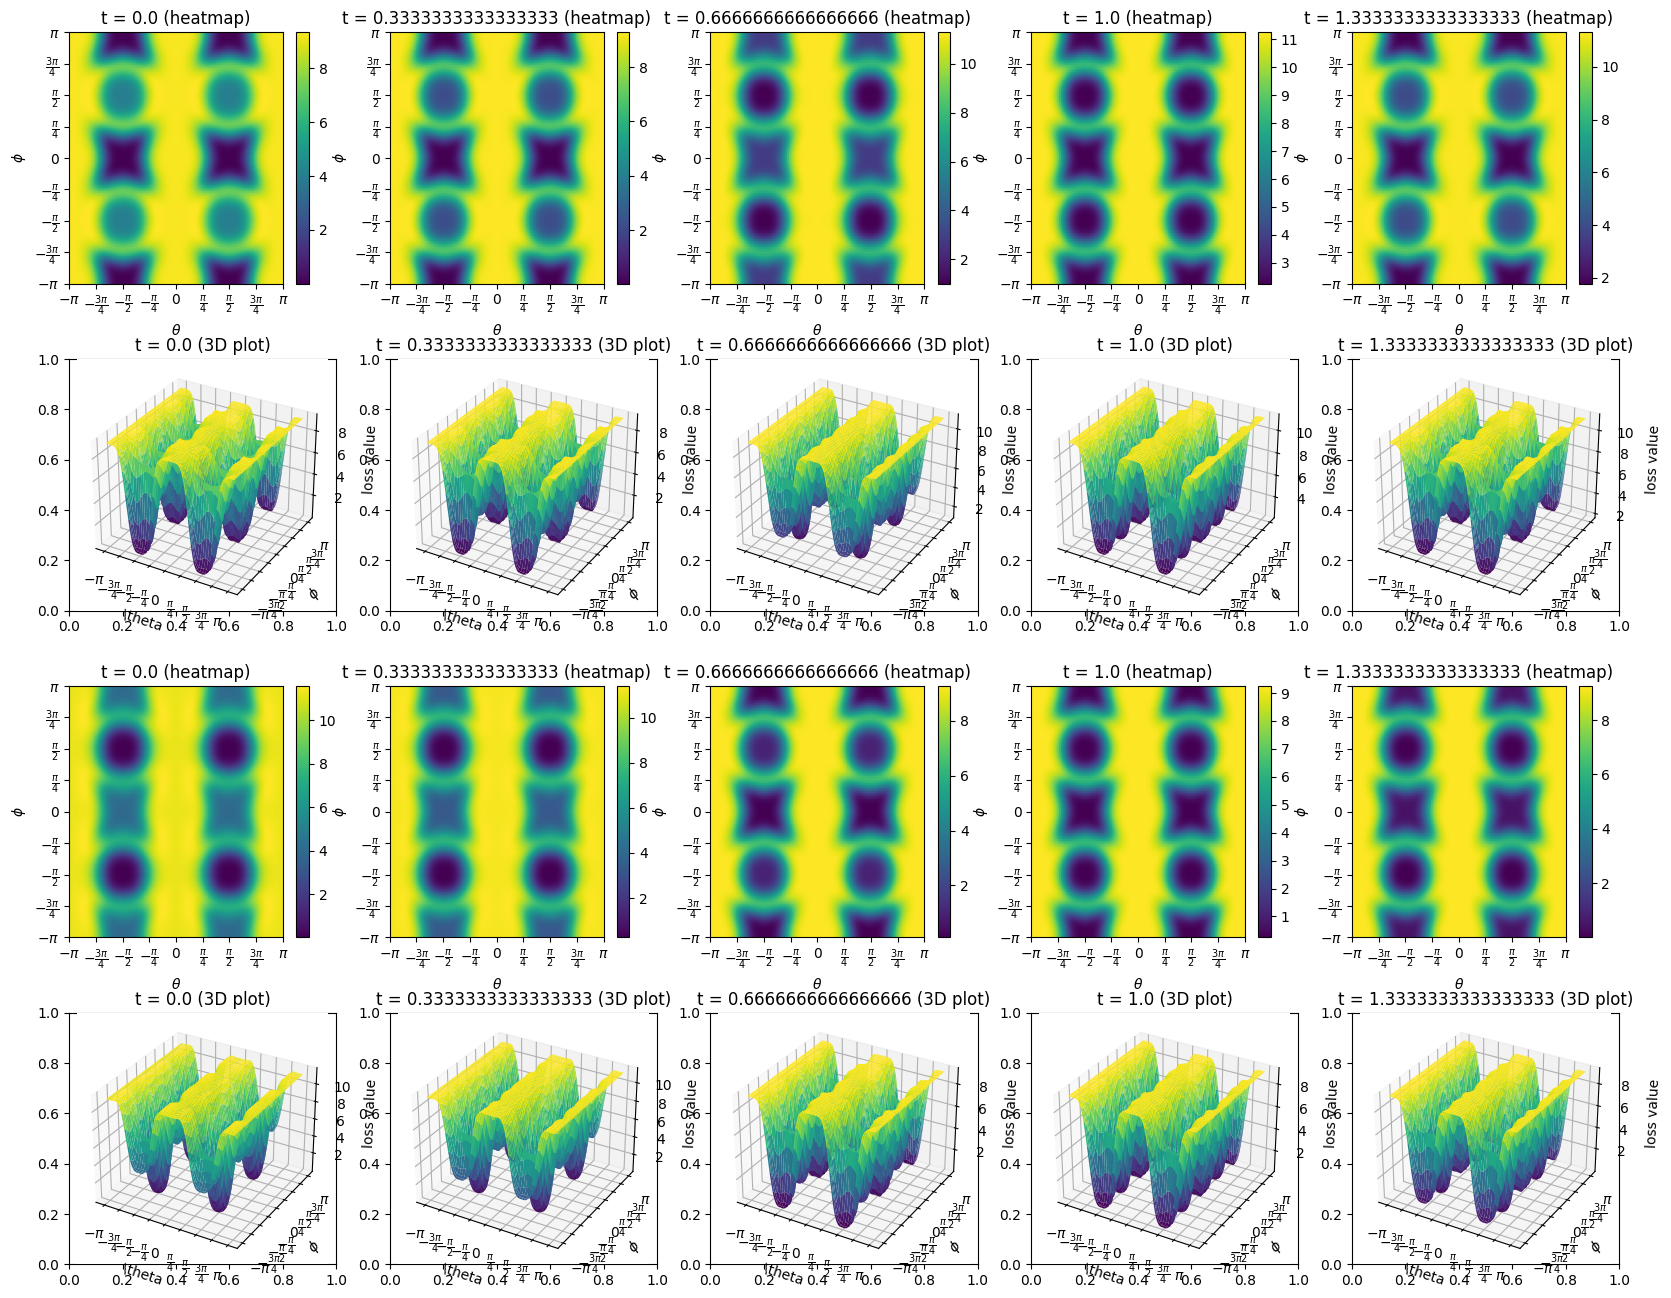

In [29]:
fig, axs = plt.subplots(4, 5, figsize=(20, 16))

for zIdx, zLabel in enumerate(zLabels):
    for i in range(5):
        #* trace result
        dm_phiMinus_t = dm_phiMinus.subs('t', t_samples[i])
        ew_t = trace(dm_phiMinus_t @ O_tilde)
        ew_t.simplify()
        ew_t = sp.nsimplify(ew_t)

        #* loss form and samples
        y_square_loss = (ew_t - zLabel[i])**2
        y_square_loss_func = sp.lambdify([theta, phi], y_square_loss, 'numpy')
        y_square_loss_func_vectorized = np.vectorize(y_square_loss_func)
        y_square_loss_values = y_square_loss_func_vectorized(theta_samples, phi_samples)
        sg_values = y_sg_func(theta_samples, phi_samples)
        y_square_loss_values_sg = np.abs(y_square_loss_values + 3*sg_values)

        axs[2*zIdx, i].set_title(f"t = {t_samples[i]} (heatmap)")
        heatmap = axs[2*zIdx, i].imshow(y_square_loss_values_sg, cmap='viridis', origin='lower',
                                extent=[-np.pi, np.pi, -np.pi, np.pi], aspect='auto')
        axs[2*zIdx, i].set_xlabel(r'$\theta$')
        axs[2*zIdx, i].set_ylabel(r'$\phi$')
        axs[2*zIdx, i].set_xticks(ticks)
        axs[2*zIdx, i].set_xticklabels(tick_labels)
        axs[2*zIdx, i].set_yticks(ticks)
        axs[2*zIdx, i].set_yticklabels(tick_labels)
        fig.colorbar(heatmap, ax=axs[2*zIdx, i])

        axs[2*zIdx+1, i] = fig.add_subplot(4, 5, 10*zIdx+i+6, projection='3d')
        axs[2*zIdx+1, i].set_title(f"t = {t_samples[i]} (3D plot)")
        surf = axs[2*zIdx+1, i].plot_surface(theta_samples, phi_samples, y_square_loss_values_sg, cmap='viridis', edgecolor='none')
        axs[2*zIdx+1, i].set_xlabel(r'\theta')
        axs[2*zIdx+1, i].set_ylabel(r'$\phi$')
        axs[2*zIdx+1, i].set_xticks(ticks)
        axs[2*zIdx+1, i].set_xticklabels(tick_labels)
        axs[2*zIdx+1, i].set_yticks(ticks)
        axs[2*zIdx+1, i].set_yticklabels(tick_labels)
        axs[2*zIdx+1, i].set_zlabel('loss value')
    
plt.subplots_adjust(hspace=0.3)
plt.show()

# Summary:

    1. This type of circuit could only provide optimal solutions for labeling strategy -1 ew<0 as e_states case, too
    2. SG provides two single optimal points, the (pi/2, pi/2) one is what we want in the above strategy
    3. samples could be separated into 4 parts (though e_states and s_states in general):
       1. [0,2/3)  e_states and able to train using even one sample
       2. [2/3, 1) s_states and biased
       3. 1        s_states and unable to train
       4. (1,4/3]  s_states and able to train using even one sample
    4. After adding SG, though changing weights, type_3 samples would still unable to lead to optimal result directly, and when weighting too much, other samples would become unable to train.


    Then, we need (from 2_2 case):
    5. find more complex circuits that could suit both labeling strategy?
    6. talk about why choosing such circuit rather than normal pqcs?
    7. what if we use normal pqcs？
    8. what if we do not know the ob in advance?


it seems if we use +-1/2 as labels, we could see consistency for both parts?

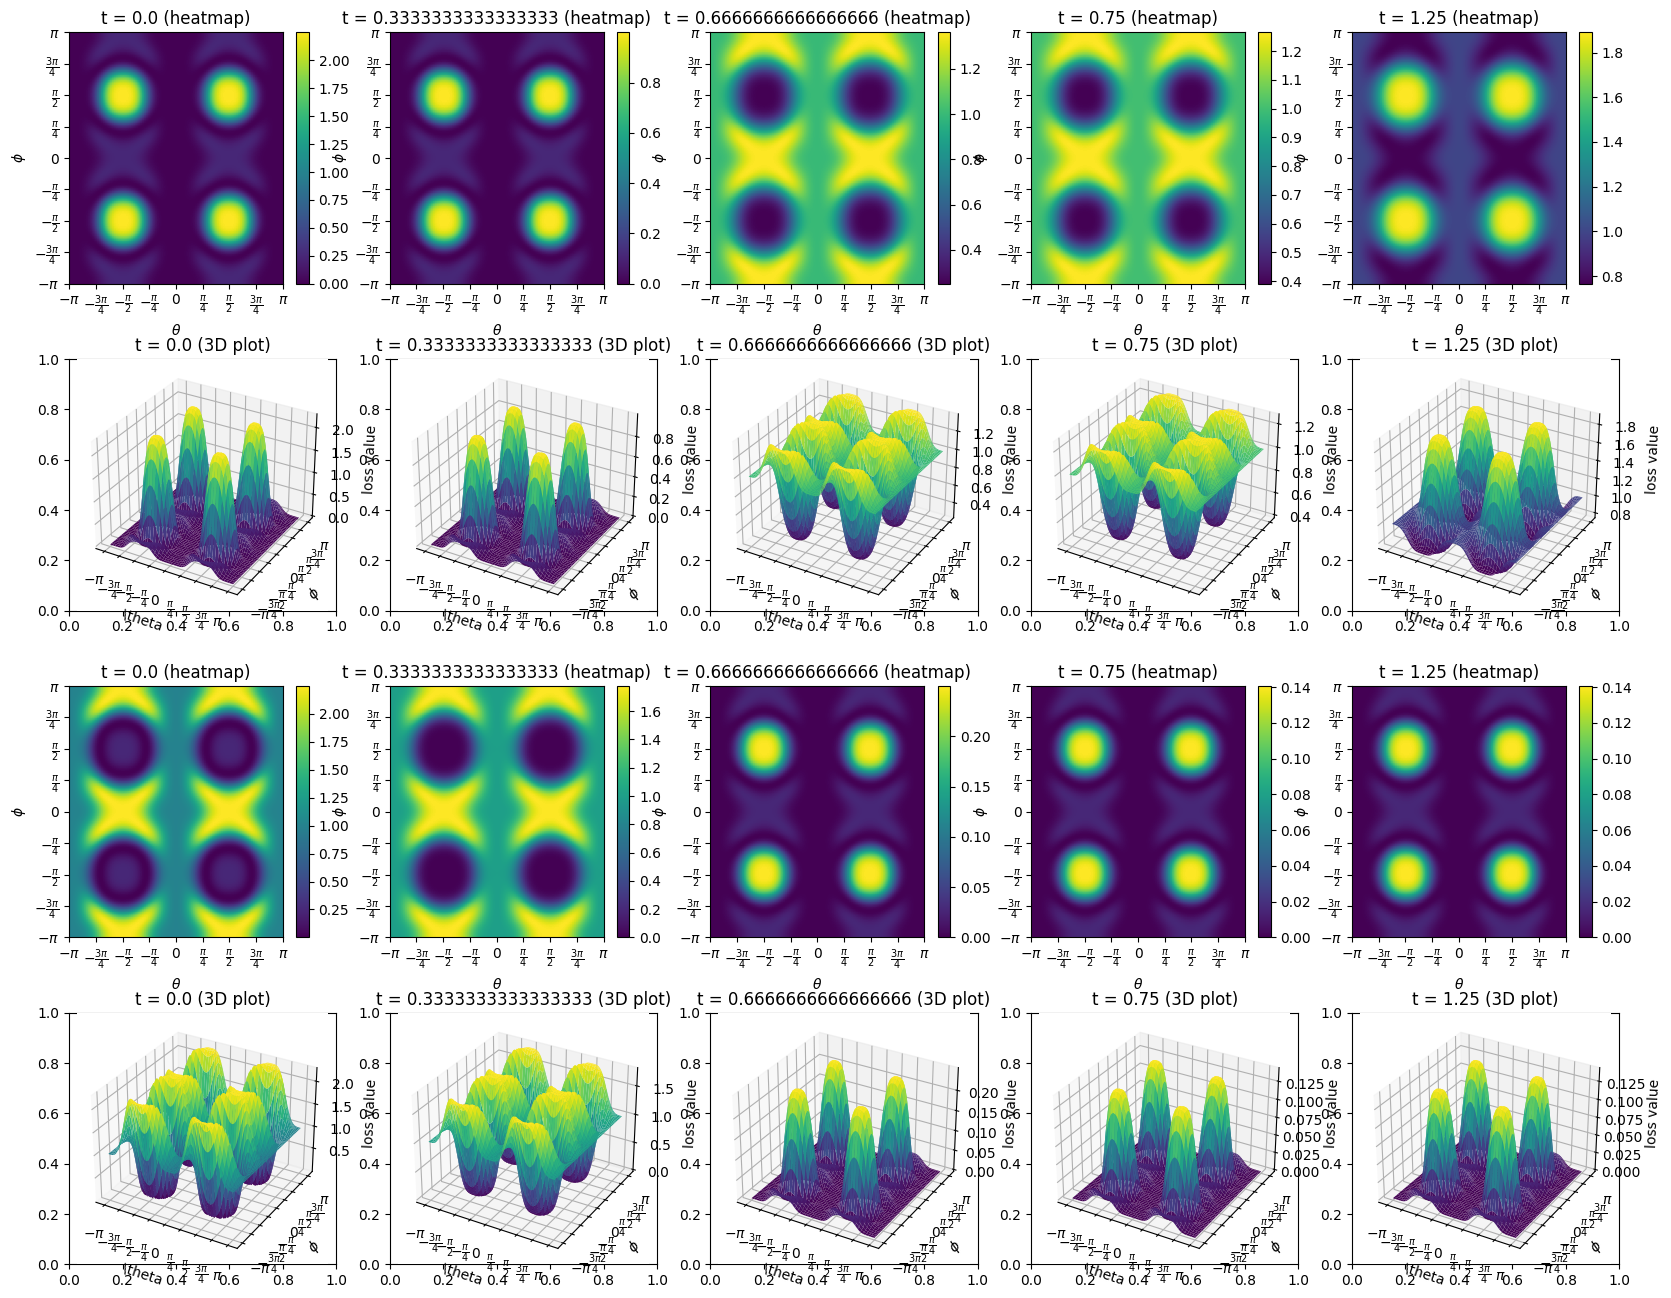

In [44]:
zLabels = [[1/2, 1/2, -1/2, -1/2, -1/2], [-1/2, -1/2, 1/2, 1/2, 1/2]] # entangled (f>=0) as 1 | entangled as -1

theta_samples = np.linspace(-np.pi, np.pi, 100)

fig, axs = plt.subplots(4, 5, figsize=(20, 16))

for zIdx, zLabel in enumerate(zLabels):
    for i in range(5):
        #* trace result
        dm_phiMinus_t = dm_phiMinus.subs('t', t_samples[i])
        ew_t = trace(dm_phiMinus_t @ O_tilde)

        #* loss form and samples
        y_square_loss = (ew_t - zLabel[i])**2
        y_square_loss_func = sp.lambdify([theta, phi], y_square_loss, 'numpy')
        y_square_loss_func_vectorized = np.vectorize(y_square_loss_func)
        y_square_loss_values = np.abs(y_square_loss_func_vectorized(theta_samples, phi_samples))

        axs[2*zIdx, i].set_title(f"t = {t_samples[i]} (heatmap)")
        heatmap = axs[2*zIdx, i].imshow(y_square_loss_values, cmap='viridis', origin='lower',
                                extent=[-np.pi, np.pi, -np.pi, np.pi], aspect='auto')
        axs[2*zIdx, i].set_xlabel(r'$\theta$')
        axs[2*zIdx, i].set_ylabel(r'$\phi$')
        axs[2*zIdx, i].set_xticks(ticks)
        axs[2*zIdx, i].set_xticklabels(tick_labels)
        axs[2*zIdx, i].set_yticks(ticks)
        axs[2*zIdx, i].set_yticklabels(tick_labels)
        fig.colorbar(heatmap, ax=axs[2*zIdx, i])

        axs[2*zIdx+1, i] = fig.add_subplot(4, 5, 10*zIdx+i+6, projection='3d')
        axs[2*zIdx+1, i].set_title(f"t = {t_samples[i]} (3D plot)")
        surf = axs[2*zIdx+1, i].plot_surface(theta_samples, phi_samples, y_square_loss_values, cmap='viridis', edgecolor='none')
        axs[2*zIdx+1, i].set_xlabel(r'\theta')
        axs[2*zIdx+1, i].set_ylabel(r'$\phi$')
        axs[2*zIdx+1, i].set_xticks(ticks)
        axs[2*zIdx+1, i].set_xticklabels(tick_labels)
        axs[2*zIdx+1, i].set_yticks(ticks)
        axs[2*zIdx+1, i].set_yticklabels(tick_labels)
        axs[2*zIdx+1, i].set_zlabel('loss value')
    
plt.subplots_adjust(hspace=0.3)
plt.show()

seems just like what we thought above, but this is a special case that we know the separation in advance.

In general cases, we might only use samples while not knowing much details to finish task.